In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from nn_utils import *

tf.enable_eager_execution()

In [2]:
# Get dataset
train_set_input,train_set_label,test_set_input,test_set_label = load_dataset()

print("Images train:", train_set_input.shape)
print("Labels train:", train_set_label.shape)
print("Images test:", test_set_input.shape)
print("Labels test:", test_set_label.shape)

classes = ["copperhead","cottonmouth","watersnake"]

Images train: (776, 128, 128, 3)
Labels train: (776,)
Images test: (86, 128, 128, 3)
Labels test: (86,)


In [3]:
# Shape of a image
train_set_input[0,:,:,:].shape

(128, 128, 3)

In [4]:
# Transform the label on vector label

Y_train = convert_to_one_hot(train_set_label,3)
Y_test = convert_to_one_hot(test_set_label,3)

Classe: copperhead


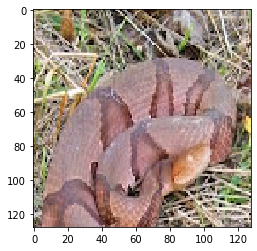

In [5]:
# Print a random Image from the train set
idx = np.random.randint(0,train_set_input.shape[0])
plt.imshow(train_set_input[idx])
print("Classe: {}".format(classes[np.where(Y_train[:,idx]==1)[0][0]]))

In [ ]:
# Flip and rotate the images to augment dataset 

def augment_data_set(input_dataset,input_labels):
    augmented_dataset_image = input_dataset
    augmented_dataset_label = input_labels
    for i in range(input_dataset.shape[0]):
        img = input_dataset[i,:,:,:]
        label = input_labels[i]
        img_flip = tf.image.flip_left_right(img)
        img_rot_1 = tf.contrib.image.rotate(img,np.deg2rad(25))
        img_rot_2 = tf.contrib.image.rotate(img,np.deg2rad(-25))
        img_flip = img_flip.numpy().reshape((1,128,128,3))
        img_rot_1 = img_rot_1.numpy().reshape((1,128,128,3))
        img_rot_2 = img_rot_2.numpy().reshape((1,128,128,3))
        augmented_dataset_image = np.concatenate((augmented_dataset_image,img_flip),axis=0)
        augmented_dataset_label = np.append(augmented_dataset_label,label)
        augmented_dataset_image = np.concatenate((augmented_dataset_image,img_rot_1),axis=0)
        augmented_dataset_label = np.append(augmented_dataset_label,label)
        augmented_dataset_image = np.concatenate((augmented_dataset_image,img_rot_2),axis=0)
        augmented_dataset_label = np.append(augmented_dataset_label,label)
    # SHUFFLE DATASET
    np.random.seed(123)
    idx = np.random.permutation(len(augmented_dataset_image))
    augmented_dataset_image = augmented_dataset_image[idx]
    augmented_dataset_label = augmented_dataset_label[idx]
    return augmented_dataset_image,augmented_dataset_label

In [ ]:
augmented_dataset_image,augmented_dataset_label = augment_data_set(train_set_input,train_set_label)

In [ ]:
Y_train = convert_to_one_hot(augmented_dataset_label,3)

idx = np.random.randint(0,augmented_dataset_image.shape[0])
plt.imshow(augmented_dataset_image[idx])
print("Classe: {}".format(classes[np.where(Y_train[:,idx]==1)[0][0]]))

In [6]:
# Reshape Data for FC NN

# Normalize
#X_train = augmented_dataset_image/255
X_train = train_set_input/255
X_test = test_set_input/255
# Reshape
# X_train = X_train.reshape(X_train.shape[0],-1).T
# X_test = X_test.reshape(X_test.shape[0],-1).T

print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)



(776, 128, 128, 3)
(3, 776)
(86, 128, 128, 3)
(3, 86)


## ARCHITECTURE of the NN

In [11]:
# simple testing NN
model = Sequential([
    layers.Flatten(input_shape=(128, 128,3)),
    layers.Dense(128,activation=tf.nn.relu),
    layers.Dense(64,activation=tf.nn.relu),
    layers.Dense(32,activation=tf.nn.relu),
    layers.Dense(3,activation=tf.nn.softmax)]
)

In [12]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.fit(X_train, Y_train.T, epochs=50,batch_size=16)

W0926 14:55:34.857143 140603451750208 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
776/776 [==============================] - 1s 688us/sample - loss: 11.0193 - acc: 0.3015
Epoch 2/50
776/776 [==============================] - 0s 242us/sample - loss: 11.3201 - acc: 0.2977
Epoch 3/50
776/776 [==============================] - 0s 248us/sample - loss: 11.3201 - acc: 0.2977
Epoch 4/50
776/776 [==============================] - 0s 252us/sample - loss: 11.3201 - acc: 0.2977
Epoch 5/50
776/776 [==============================] - 0s 251us/sample - loss: 11.3201 - acc: 0.2977
Epoch 6/50
776/776 [==============================] - 0s 255us/sample - loss: 11.3201 - acc: 0.2977
Epoch 7/50
776/776 [==============================] - 0s 254us/sample - loss: 11.3201 - acc: 0.2977
Epoch 8/50
776/776 [==============================] - 0s 250us/sample - loss: 11.3201 - acc: 0.2977
Epoch 9/50
776/776 [==============================] - 0s 241us/sample - loss: 11.3201 - acc: 0.2977
Epoch 10/50
776/776 [==============================] - 0s 242us/sample - loss: 11.3201 - acc: 0.2977

In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test.T)

print('Test accuracy:', test_acc)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
idx = np.random.randint(0,test_set_input.shape[0])
plt.imshow(test_set_input[idx])
print("Predicted Classe: {}".format(classes[np.argmax(predictions[idx,:])]))
print("Classe: {}".format(classes[np.where(Y_test[:,idx]==1)[0][0]]))

In [ ]:
model.summary()